In [2]:
import sys
import pandas as pd
import numpy as np
import sklearn
from sklearn import *
import matplotlib
import matplotlib.pyplot as plt


%matplotlib inline

In [3]:
df = pd.read_csv("/data/insurance.csv")
df.head()

,age,gender,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Text(0.5,1,'Histogram of charges')

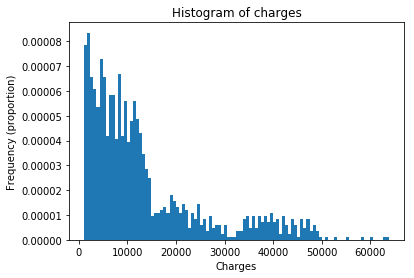

In [9]:
df.charges.plot.hist(bins = 100, normed = True)
plt.xlabel("Charges")
plt.ylabel("Frequency (proportion)")
plt.title("Histogram of charges")

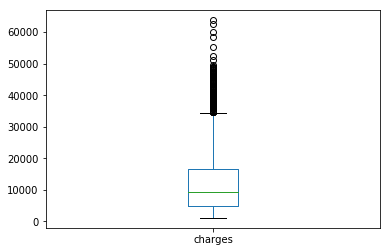

In [14]:
df.charges.plot.box()

In [23]:
def find_outliers(y):
    q1, q2, q3 = np.percentile(y, [25, 50, 75])
    iqr = q3 - q1
    upper_whisker = np.min([q3 + 1.5 * iqr, np.max(y)])
    lower_whisker = np.max([q1 - 1.5 * iqr, np.min(y)])
    return (y > upper_whisker) | (y < lower_whisker)
outliers = find_outliers(df.charges)

In [24]:
outliers

0       False
1       False
2       False
3       False
4       False
5       False
6       False
7       False
8       False
9       False
10      False
11      False
12      False
13      False
14       True
15      False
16      False
17      False
18      False
19       True
20      False
21      False
22      False
23       True
24      False
25      False
26      False
27      False
28      False
29       True
        ...  
1308    False
1309    False
1310    False
1311    False
1312    False
1313     True
1314    False
1315    False
1316    False
1317    False
1318    False
1319    False
1320    False
1321    False
1322    False
1323     True
1324    False
1325    False
1326    False
1327    False
1328    False
1329    False
1330    False
1331    False
1332    False
1333    False
1334    False
1335    False
1336    False
1337    False
Name: charges, Length: 1338, dtype: bool

In [26]:
df.charges[outliers].shape

(139,)

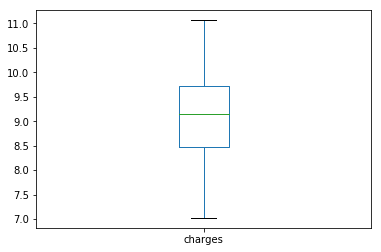

In [27]:
np.log(df.charges).plot.box()

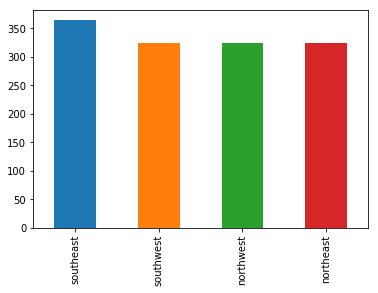

In [33]:
df.region.value_counts().plot.bar()

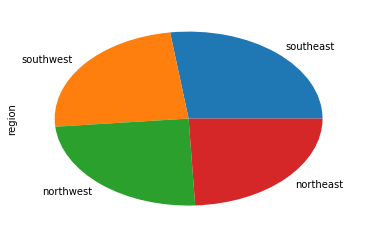

In [34]:
df.region.value_counts().plot.pie()

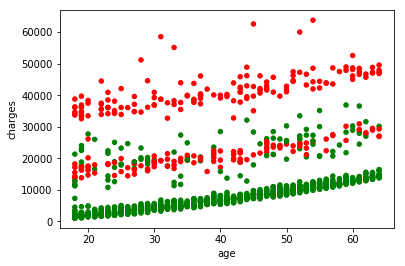

In [41]:
colors = np.where(df.smoker == "yes", "red", "green")
df.plot.scatter("age", "charges", color = colors)

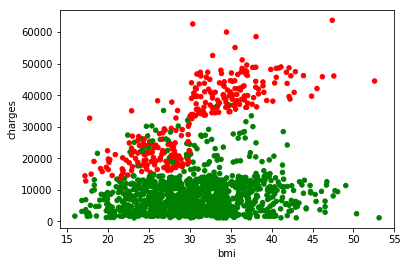

In [57]:
colors = np.where(df.smoker == "yes", "red", "green")
df.plot.scatter("bmi", "charges", color = colors)

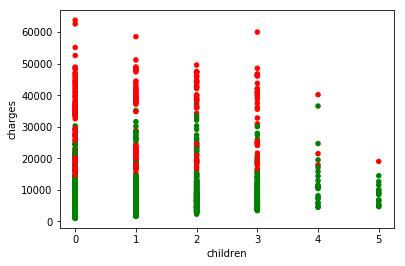

In [58]:
colors = np.where(df.smoker == "yes", "red", "green")
df.plot.scatter("children", "charges", color = colors)

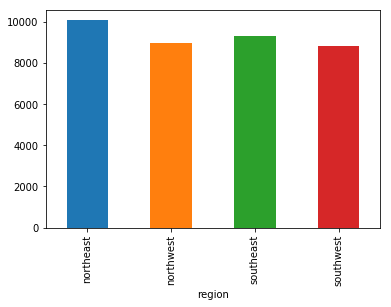

In [42]:
df.groupby("region").charges.median().plot.bar()

In [46]:
import seaborn as sns

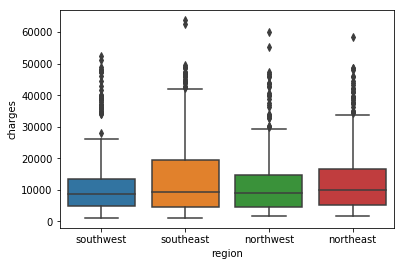

In [47]:
sns.boxplot("region", "charges", data=df)

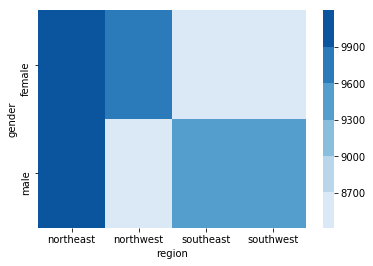

In [55]:
agg = df.groupby(["gender", "region"]).charges.median().unstack()
sns.heatmap(agg, cmap=sns.color_palette("Blues"))